# Basic Libraries


In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

#Importing Dataset

In [ ]:
db = pd.read_csv("water_potability.csv")
print(db)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

#Data Cleaning

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
db.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
#replacing null value
db.fillna(db.mean(),inplace=True)

In [ ]:
db.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

#EDA


In [ ]:
db.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


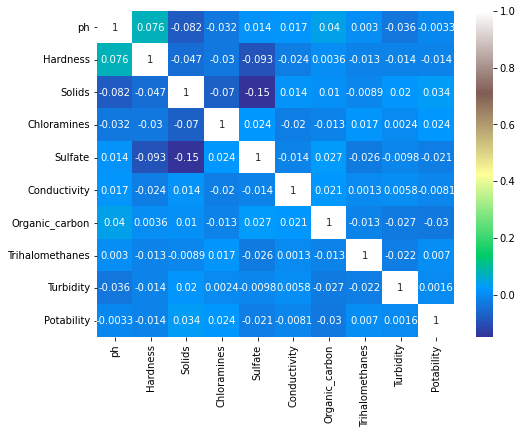

In [ ]:
### Dimensional Reduction HeadMap
sns.heatmap(db.corr(),annot=True,cmap='terrain')
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.show()
# If correlation is more than 70-80% then we can remove any one colum

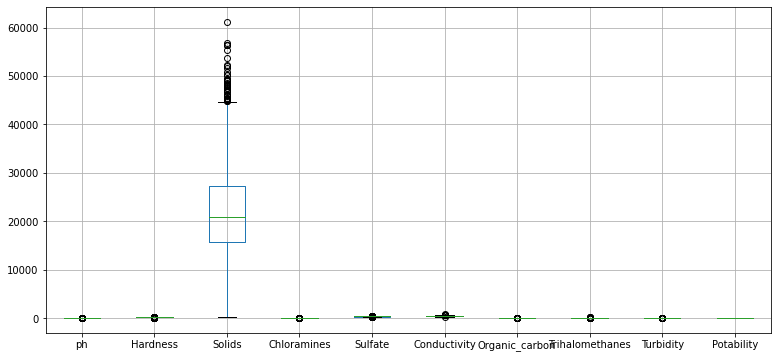

In [ ]:
# Outlier Removal Box Plot
db.boxplot(figsize=(13,6))
plt.show()

In [ ]:
db['Solids'].describe()
# Yes it is normal to get this large value or we decided to remove it( it need to be in documentation)

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

In [ ]:
#Not removing the outliees cause they may be important

In [ ]:
# label encoding/ one hot encoding - converting words to int

# More EDA

In [ ]:
db.head()
db.shape

(3276, 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


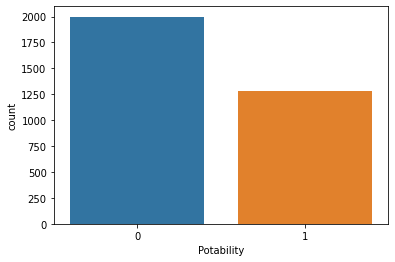

In [ ]:
# Inbalance data if bad example are more then data will be biased
sns.countplot(db['Potability'])

In [ ]:
db['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22cf317490>,
      dtype=object)

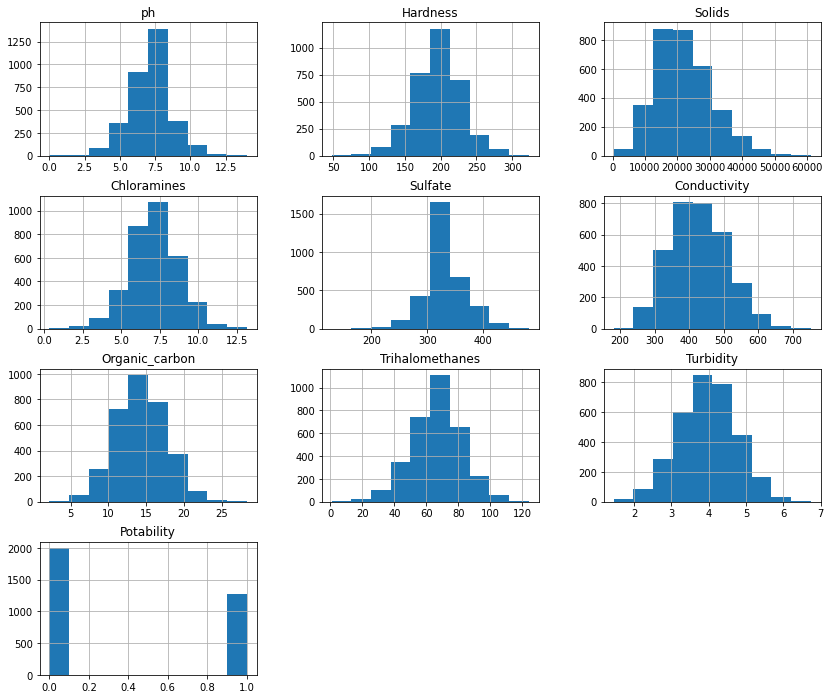

In [ ]:
# check biased input
db.hist(figsize=(14,12))

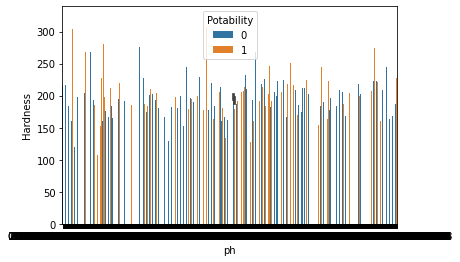

In [ ]:
sns.barplot(x=db['ph'],y=db['Hardness'],hue=db['Potability'])
plt.show()

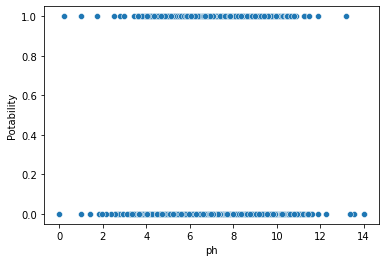

In [ ]:
sns.scatterplot(x=db['ph'],y=db['Potability'])

In [ ]:
#Partitioning
X = db.iloc[:,:-1]
y = db.iloc[:,-1]
print(X,y)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013       

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)

In [ ]:
#Normalization
#graph are pretty normal to so no, if skew then use StandardScaler

# Model Training

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_test

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
acc_s = accuracy_score(y_pred,y_test)
print(acc_s)
confusion_matrix(y_pred,y_test)

0.5914634146341463


array([[268, 124],
       [144, 120]])

In [ ]:
# Try more ML models
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn_model.predict(X_test)

In [ ]:
acc_s_knn = accuracy_score(y_test,y_pred)
print(acc_s_knn)
confusion_matrix(y_test,y_pred_knn)
#From confusion_matrix it is can be seen that is biased to only values that are true

0.5914634146341463


array([[288, 124],
       [174,  70]])

In [ ]:
#SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_svc = svc.predict(X_test)

In [ ]:
acc_s_svc = accuracy_score(y_test,y_pred_svc)
print(acc_s_svc)
confusion_matrix(y_test,y_pred_svc)

0.6265243902439024


array([[411,   1],
       [244,   0]])

In [ ]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_lr = lr.predict(X_test)

In [ ]:
acc_s_lr =accuracy_score(y_test,y_pred_lr)
print(acc_s_lr)
confusion_matrix(y_test,y_pred_lr)

0.6280487804878049


array([[412,   0],
       [244,   0]])

In [ ]:
#Native Bays
from sklearn.naive_bayes import GaussianNB
cnb = GaussianNB()
cnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred_cnb = cnb.predict(X_test)

In [ ]:
acc_s_cnb = accuracy_score(y_test,y_pred_cnb)
print(acc_s_cnb)
confusion_matrix(y_test,y_pred_cnb)

0.6158536585365854


array([[353,  59],
       [193,  51]])

# Model Optimization /Hyper Parameter Tuning

In [ ]:
#Grid Search cv will use all the parameters whereas random will use only few
#Cross Validation: Grouping X_train in part so that in each eaxample it will take 1/5th of X_train
#and train it such a way that 4/5 will be use for training and other 1/5 for testing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

dt = DecisionTreeClassifier()

criterion = ["gini","entropy"]
splitter = ['best','random']
min_samples_split = range(1,10)

parameters = dict(criterion=criterion, splitter=splitter,min_samples_split=min_samples_split)
cv = RepeatedStratifiedKFold(n_splits=5,random_state=101)

grid_search_cv_dt = GridSearchCV(estimator=dt,param_grid=parameters,scoring='accuracy',cv=cv)

In [ ]:
grid_search_cv_dt.estimator.get_params().keys()
# grid_search_cv_dt.fit(X_train,y_train)

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:
grid_search_cv_dt.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=101),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
print(grid_search_cv_dt.best_params_)

{'criterion': 'entropy', 'min_samples_split': 8, 'splitter': 'random'}


In [ ]:
pred_grid = grid_search_cv_dt.predict(X_test)

In [ ]:
accuracy_score(y_test,pred_grid)

0.6036585365853658

In [ ]:
confusion_matrix(y_test,pred_grid)

array([[292, 120],
       [140, 104]])